In [1]:
catName = 'high'

In [2]:
import sys, os, pickle, time, re
from glob import glob
sys.path.append('../lib')
sys.path.append('../analysis')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array

import ROOT as rt
rt.TGaxis.SetMaxDigits(4)
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)
import ROOT.RooFit as rf
import root_numpy as rtnp

from analysis_utilities import drawOnCMSCanvas, getEff, DSetLoader
from histo_utilities import create_TH1D, create_TH2D, SetMaxToMaxHist
from gridVarQ2Plot import col_dic, label_dic
from progressBar import ProgressBar
from categoriesDef import categories
cat = categories[catName]

from lumi_utilities import getLumiByTrigger

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1


CMS_lumi.extraText = 7*' ' + 'Internal'

donotdelete = []

Welcome to JupyROOT 6.12/07


In [4]:
m_mu = 0.1056583755
m_Dst = 2.01026
m_B0 = 5.2796

In [5]:
catText = rt.TLatex()
catText.SetTextAlign(31)
catText.SetTextSize(0.06)
catText.SetTextFont(42)
catText.SetTextSize(0.05)

In [6]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [7]:
d0 = pd.DataFrame(rtnp.root2array('../data/cmsRD/skimmed/B2DstMu_B0_201101_{}_skip16_corr.root'.format(cat.name)))
d1 = pd.DataFrame(rtnp.root2array('../data/cmsRD/skimmed/B2DstMu_antiB0_201122_{}_skip16_corr.root'.format(cat.name)))
dfSig = pd.concat([d0, d1])

d0 = pd.DataFrame(rtnp.root2array('../data/cmsRD/skimmed/B2DstMu_DstmHadp_201102_{}_skip16_corr.root'.format(cat.name)))
d1 = pd.DataFrame(rtnp.root2array('../data/cmsRD/skimmed/B2DstMu_DstpHadm_201228_{}_skip16_corr.root'.format(cat.name)))
dfBkg = pd.concat([d0, d1])
del d0, d1

In [8]:
expectedLumi = {'Low':6.4, 'Mid':20.7, 'High':26.4, 'Single':20.7} #fb^-1
CMS_lumi.integrated_lumi = expectedLumi[cat.name]

In [9]:
' '.join(np.sort(dfSig.columns))

'B_eta B_phi B_pt D0_eta D0_phi D0_pt D0pismu_eta D0pismu_phi Dst_eta Dst_phi Dst_pt Est_mu Est_mu_coll K_eta K_phi K_pt M2_miss M2_miss_coll N_goodAddTks N_vtx U_miss UmissTks cat_high cat_low cat_mid chi2_D0pismu cosT_D0pismu_PV cos_D0pismu_PV d_vtxD0pismu_PV dxy_vtxD0pismu_PV index localVertexDensity massHadTks massHadTks_DstMassConstraint massVisTks mass_D0pis mass_D0pismu mass_D0pismu_muASK mass_D0pismu_muASpi mass_piK muPass_Mu12_IP6 muPass_Mu7_IP4 muPass_Mu9_IP6 mu_dcaT_vtxDst mu_dcaT_vtxDstMu mu_dca_vtxDst mu_dca_vtxDstMu mu_eta mu_phi mu_pt mu_sigdcaT_vtxDst mu_sigdcaT_vtxDstMu mu_sigdca_vtxDst mu_sigdca_vtxDstMu mu_sigdxy pi_eta pi_phi pi_pt pis_eta pis_phi pis_pt pval_D0pis pval_D0pismu pval_piK q2 q2_coll sigdxy_vtxD0_PV tkCharge_0 tkCharge_1 tkCharge_2 tkEta_0 tkEta_1 tkEta_2 tkMassHad_0 tkMassHad_1 tkMassHad_2 tkMassMiss2_0 tkMassMiss2_1 tkMassMiss2_2 tkMassMuTk_0 tkMassMuTk_1 tkMassMuTk_2 tkMassVis_0 tkMassVis_1 tkMassVis_2 tkPhi_0 tkPhi_1 tkPhi_2 tkPtError_0 tkPtError_1

# Visible system mass

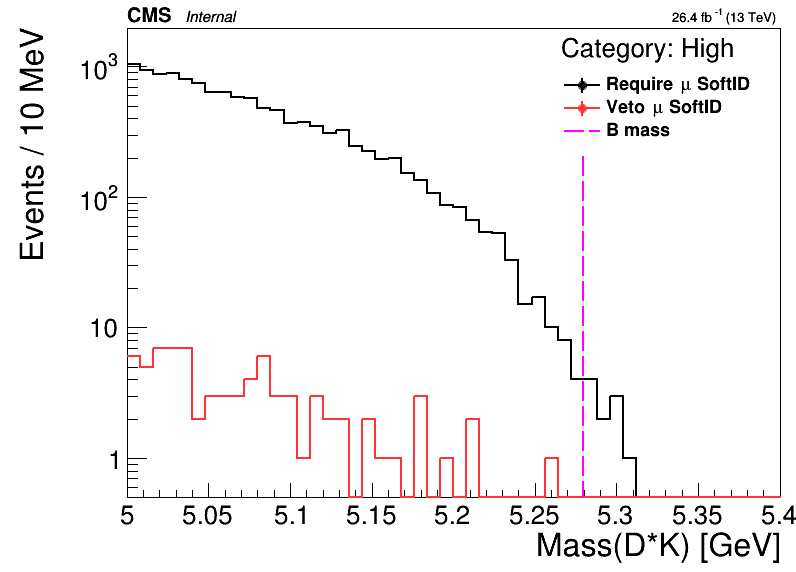

In [10]:
h1 = create_TH1D(dfSig['mass_D0pismu_muASK'], 
                 binning=[50, 5.0, 5.4],
                 opt='overflow',
                 axis_title=['Mass(D*K) [GeV]', 'Events / 10 MeV'],
                )
h1.SetMarkerStyle(8)
h2 = create_TH1D(dfBkg['mass_D0pismu_muASK'], binning=h1.binning,
                 opt='overflow',
                 color=1
                )
h2.SetMarkerStyle(8)

leg = rt.TLegend(0.7, 0.75, 0.95, 0.87)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(h1, 'Require #mu SoftID', 'lep')
leg.AddEntry(h2, 'Veto #mu SoftID', 'lep')
leg.AddEntry(cl, 'B mass', 'l')
    
c = drawOnCMSCanvas(CMS_lumi, [h1, h2], 'same')
c.SetLogy()
catText.DrawLatexNDC(0.93, 0.9, 'Category: {}'.format(cat.name))
leg.Draw()
cl.DrawLine(m_B0, 0.5, m_B0, h1.GetMaximum()*0.2)
c.SaveAs('../data/fig/misIDbkg_data_mDstK_{}.png'.format(cat.name))

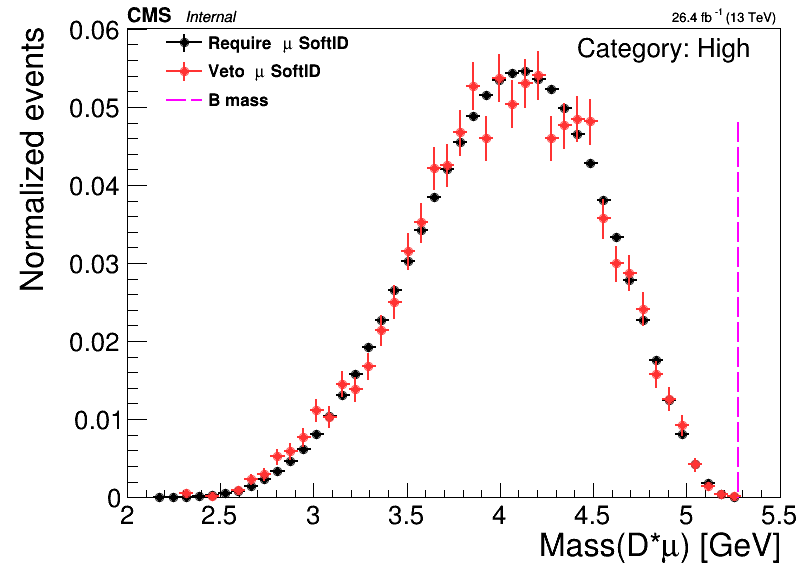

In [11]:
h1 = create_TH1D(dfSig['mass_D0pismu'], 
                 binning=[50, 2.0, 5.5],
                 opt='overflow',
                 axis_title=['Mass(D*#mu) [GeV]', 'Normalized events'],
                 scale_histo='norm'
                )
h1.SetMarkerStyle(8)
h2 = create_TH1D(dfBkg['mass_D0pismu'], binning=h1.binning,
                 opt='overflow',
                 scale_histo='norm',
                 color=1
                )
h2.SetMarkerStyle(8)

leg = rt.TLegend(0.2, 0.8, 0.45, 0.95)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.AddEntry(h1, 'Require #mu SoftID', 'lep')
leg.AddEntry(h2, 'Veto #mu SoftID', 'lep')
leg.AddEntry(cl, 'B mass', 'l')
    
SetMaxToMaxHist([h1, h2])
c = drawOnCMSCanvas(CMS_lumi, [h1, h2], 'same')
# c.SetLogy()
catText.DrawLatexNDC(0.95, 0.9, 'Category: {}'.format(cat.name))
leg.Draw()
cl.DrawLine(m_B0, 5e-7, m_B0, h1.GetMaximum()*0.8)
c.SaveAs('../data/fig/misIDbkg_data_mVisNorm_{}.png'.format(cat.name))